# CAPÍTULO 4

## EXERCÍCIO 1

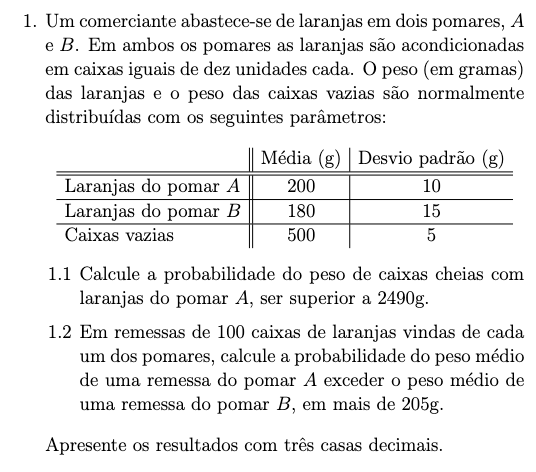

In [13]:
from scipy import stats
import numpy as     np


# 1.1) 
# XA v.a. XA = peso de uma laranjas do pomar A, em gramas
# XB v.a. XB = peso de uma laranjas do pomar B, em gramas
# XC v.a. XC = peso de uma caixa vazia, em gramas

# Y v.a. YA = Peso em gramas de uma caixa cheia com 10 laranjas do pomar A, em gramas

# P(YA > 2490)
# YA ~ N(10*200+10*10^2+5^2) = N(2500, 1025)

muA = 2500
sigmaA = np.sqrt(1025)
ya = 1 - stats.norm.cdf(2490, muA, sigmaA)
print(f'1.1) A probabilidade do peso de uma caixa ser cheia com 10 larajas do pomar A é: {ya:.3f}.')


# 1.2)

# YBbarra = peso médio de 100 caixas de 10 laranajas do pomar B, em gramas
# YBbarra ~ N(2300, 47.7^2)
# P(YBbarra > 205)
# P(YAbarra > YBbarra) = P(YAbarra - YBbarra > 0)
# YAbarra - YBbarra ~ N(200 - 2300, 125 + 47.7^2) = N(-2100, 125 + 2275.29)
# P(YAbarra - YBbarra > 0) = P(Z > (0 - (-2100)) / sqrt(125 + 2275.29))

# P(YAbarra - YBbarra > 205)
# P(Z > (2300 - (-2100))
# P(Z > (2300 - (-2100)) / sqrt(125 + 2275.29))

mu_diff = 200
sigma_diff = np.sqrt(33)
p2 = 1 - stats.norm.cdf(205, mu_diff, sigma_diff)
print(f'1.2: A probabilidade do peso médio em 100 caixas cheias com 10 laranjas do pomar A é: {p2:.3f}.')

1.1) A probabilidade do peso de uma caixa ser cheia com 10 larajas do pomar A é: 0.623.
1.2: A probabilidade do peso médio em 100 caixas cheias com 10 laranjas do pomar A é: 0.192.


## EXERCÍCIO 2

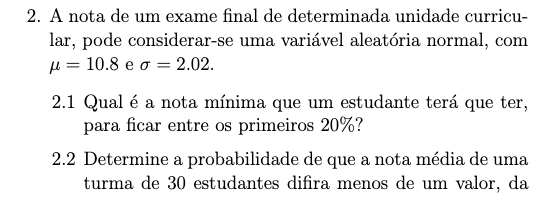

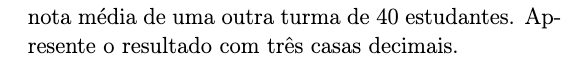

In [19]:
from scipy import stats
import numpy as np

# X v.a. X = Nota final do exame
# X ~ N(mu, sigma²)
# X ~ N(10.8, 2.02²)
# mu = 10.8
# sigma = 2.02


mu = 10.8      
sigma = 2.02   

# 2.1)
# Nota mínima para top 20% (Percentil 80%)
# P(X > nmímima) = 0.20

x_min = stats.norm.ppf(0.80, 10.8, 2.02) 
print(f'2.1 Nota mínima para top 20%: {x_min:.1f} valores.')


# 2.2)
# Probabilidade de |X̄30 - X̄40| < 1
# X̄30: Média das notas de uma turma com 30 estudantes
# X̄40: Média das notas de uma turma com 40 estudantes
# D = X̄30 - X̄40: Diferença entre as médias das turmas

n1, n2 = 30, 40

# X̄30 ~ N(mu, σ²/n1) = N(10.8, 2.02²/30)
# X̄40 ~ N(mu, σ²/n2) = N(10.8, 2.02²/40)
var_X30 = (sigma**2) / n1
var_X40 = (sigma**2) / n2

# Diferença D = X̄30 - X̄40 ~ N(0, var_X30 + var_X40)
var_D = var_X30 + var_X40
std_D = np.sqrt(var_D)

# P(|D| < delta) = P(1 < D < 1)
prob = stats.norm.cdf(1, 0, std_D) - stats.norm.cdf(-1, 0, std_D)
print(f'2.2 P(|Diferença| < 1): {prob:.3f}')

2.1 Nota mínima para top 20%: 12.5 valores.
2.2 P(|Diferença| < 1): 0.960


## EXERCÍCIO 9

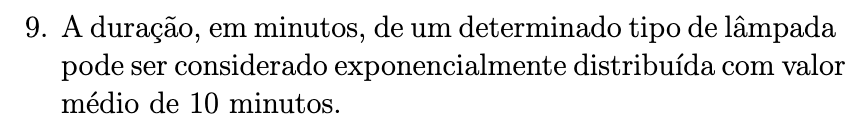
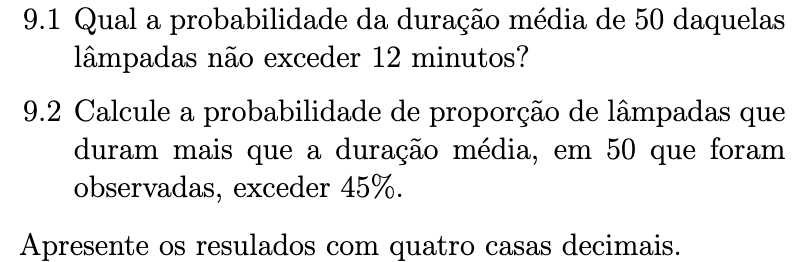

In [ ]:
from scipy import stats
import numpy as np

# X ~ Exp(λ=0.1) = Duração individual de uma lâmpada (média=10min)
# X̄50 = tempo médio da duração de 50 lâmpadas
# P̂ = Proporção amostral de lâmpadas que duram >10min em n=50


n = 50     
beta = 10       
# 9.1 - P(X̄50 ≤ 12)

# Pela CLT = X̄50 ~ N(μ=10, σ²=100/50=2)
# Var(X)=1/λ²=100

std_Xbar = np.sqrt(100 / n)

prob_9_1 = stats.norm.cdf(12, loc=beta, scale=std_Xbar)
print(f'9.1) A probabilidade da duração média de 50 lâmpadas não exceder os 12 minutos é: {prob_9_1:.4f}.')


# 9.2 - P(P̂ > 0.45)

# P(X > 10) = e^(-λ*10) ≈ 0.3679 (constante para cada lâmpada)

lambda_exp = 1/10
p = np.exp(-lambda_exp * 10)

# Pela CLT: P̂ ~ N(p=0.3679, p(1-p)/n ≈ 0.0047)
mu_Phat = p
std_Phat = np.sqrt(p * (1 - p) / n)

prob_9_2 = 1 - stats.norm.cdf(0.45, loc=mu_Phat, scale=std_Phat)
print(f'9.2) A probabilidade de 45%, de 50 lâmpadas durarem mais que proporção média de duração é: {prob_9_2:.4f}.')



9.1) A probabilidade da duração média de 50 lâmpadas não exceder os 12 minutos é: 0.9214.
9.2) A probabilidade de 45%, de 50 lâmpadas durarem mais que proporção média de duração é: 0.1143.


## EXERCÍCIO 10

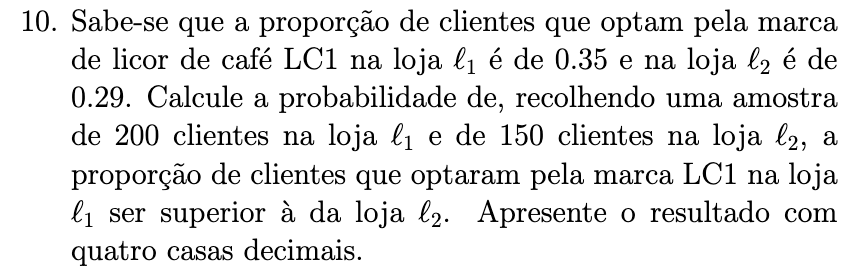

In [11]:
from scipy import stats
import numpy as np


# P̂1: Proporção de clientes que escolhem a loja l1 (n1=200)
# P̂2: Proporção de clientes que escolhem a loja l2 (n2=150)
# D = P̂1 - P̂2: Diferença entre proporções amostrais


p1 = 0.35
p2 = 0.29
n1 = 200 
n2 = 150

# Cálculo de P(P̂1 > P̂2) = P(D > 0)

# P̂1 ~ N(p1, p1(1-p1)/n1) = N(0.35, 0.0011375)
# P̂2 ~ N(p2, p2(1-p2)/n2) = N(0.29, 0.0013733)
# D ~ N(p1-p2, p1(1-p1)/n1 + p2(1-p2)/n2)

mu_D = p1 - p2  
var_D = (p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2) 
std_D = np.sqrt(var_D)  

# P(D > 0) = 1 - P(D ≤ 0)
prob = 1 - stats.norm.cdf(0, loc=mu_D, scale=std_D)
print(f'10) A proporção de clientes que preferiu a loja l1 em vez da loja 2 é: {prob:.4f}.')


10) A proporção de clientes que preferiu a loja l1 em vez da loja 2 é: 0.8845.
